Com esse trabalho pretendo demonstrar a ideia de transferencia de voto, o quanto um prefeito eleito a 2 anos antes pode influenciar nos votos para um deputado ou um governador, bem como a ideia de transferencia de voto quando 2 politicos se apoiam mutuamente, exemplo um deputado e um governador na mesma eleição.

In [3]:
import pandas as pd #Para criarmos dataframes
from votacao_utils import *

votacao = load_data_votacao('data/votacao_secao_2010_PR.txt')
votacao.head(5)

,NUM_TURNO,SIGLA_UE,MUN_COD,NUM_ZONA,NUM_SECAO,CARGO_COD,NUM_VOTAVEL,QTD_VOTOS
0,1,PR,74004,132,41,1,27,1
1,1,PR,74004,132,41,1,43,8
2,1,PR,74004,132,41,1,45,74
3,1,PR,74004,132,41,1,96,12
4,1,PR,74004,132,41,3,12,134


Limpeza os votos brancos, nulos e exceções que são os votos de numero 95, 96 e 97

In [4]:
votacao.drop(votacao[votacao['NUM_VOTAVEL'] == 97].index, inplace=True, axis=0)
votacao.drop(votacao[votacao['NUM_VOTAVEL'] == 96].index, inplace=True, axis=0)
votacao.drop(votacao[votacao['NUM_VOTAVEL'] == 95].index, inplace=True, axis=0)

Ao chamar dtypes, verificamos que os tipos aplicados estão corretos.

In [5]:
votacao.dtypes

NUM_TURNO       int64
SIGLA_UE       object
MUN_COD         int64
NUM_ZONA        int64
NUM_SECAO       int64
CARGO_COD       int64
NUM_VOTAVEL     int64
QTD_VOTOS       int64
dtype: object

A funcao describe() se mostrou pouco produtiva para a coleção de dados de votação, 

In [6]:
votacao.describe()


,NUM_TURNO,MUN_COD,NUM_ZONA,NUM_SECAO,CARGO_COD,NUM_VOTAVEL,QTD_VOTOS
count,2.480702e+06,2.480702e+06,2.480702e+06,2.480702e+06,2.480702e+06,2.480702e+06,2.480702e+06
mean,1.019176e+00,7.633960e+04,1.051968e+02,1.408137e+02,5.985276e+00,1.053017e+04,1.608486e+01
std,1.371420e-01,1.791338e+03,6.905091e+01,1.431242e+02,1.534588e+00,1.446957e+04,3.699980e+01
min,1.000000e+00,7.400400e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+01,1.000000e+00
25%,1.000000e+00,7.535300e+04,4.100000e+01,4.100000e+01,6.000000e+00,1.110000e+02,1.000000e+00
50%,1.000000e+00,7.541800e+04,1.150000e+02,9.300000e+01,6.000000e+00,2.505000e+03,2.000000e+00
75%,1.000000e+00,7.739900e+04,1.740000e+02,1.860000e+02,7.000000e+00,1.517800e+04,7.000000e+00
max,2.000000e+00,8.471900e+04,2.060000e+02,7.530000e+02,7.000000e+00,7.077700e+04,2.930000e+02


In [7]:
votacao.shape

(2480702, 8)

Abaixo separamos o resultado eleitoral do ano de 2010 entre governadores e senadores. Ao consultar com os resultados oficiais na internet é verificado que os valores estão de acordo.

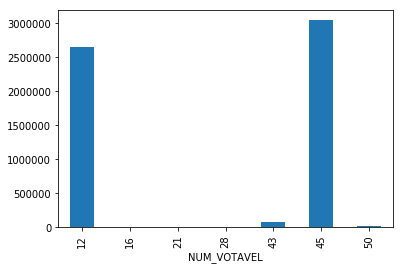

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

governador = votacao[votacao['CARGO_COD'] == 3]
governador.groupby('NUM_VOTAVEL').sum()['QTD_VOTOS'].plot(kind='bar')

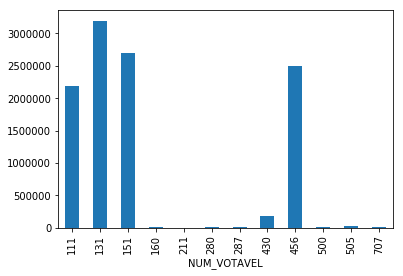

In [9]:
senador = votacao[votacao['CARGO_COD'] == 5]
senador.groupby('NUM_VOTAVEL').sum()['QTD_VOTOS'].plot(kind='bar')

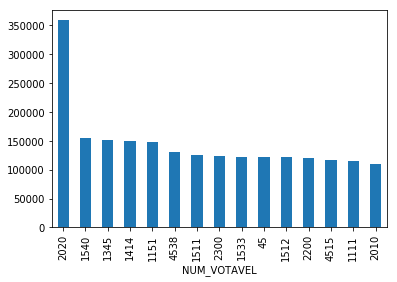

In [10]:
senador = votacao[votacao['CARGO_COD'] == 6]
senador.groupby('NUM_VOTAVEL').sum()['QTD_VOTOS'].sort_values(ascending=False).nlargest(15).plot(kind='bar')